Rocket Sales Corp

Problem Statement:

The problem is to develop a predictive model that can take into account historical data 
consisting of the advertising budgets allocated to different media channels, namely TV, radio, 
and newspaper and accurately estimate sales for future advertising campaigns.

The ultimate objective is to provide insights and recommendations to businesses on how to effectively
distribute their advertising budgets across TV, radio, and newspaper in order to optimize sales and 
maximize their return on investment (ROI).

# Importing libraries / Read data

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [210]:
import warnings
warnings.filterwarnings('ignore')

In [211]:
df = pd.read_csv('Advertising.csv')

In [212]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1. Exploratory Data Analysis

## Shape of the data

In [213]:
df.shape

(200, 5)

## Number and data types of variables

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [215]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [216]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

## Five point summary (Statistical summary)

In [217]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Missing values

In [218]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Observations
- There are 200 records with 4 features.
- All the features are of type float
- There are no null values in the dataset.

##  Non-Graphical Analysis: Value counts and unique attributes

In [219]:
for column in df:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values(ascending = False))
    print('\n')

TV :  190
199.8    2
17.2     2
177.0    2
222.4    2
240.1    2
184.9    2
197.6    2
237.4    2
76.4     2
109.8    2
8.7      1
8.6      1
120.2    1
57.5     1
62.3     1
180.8    1
151.5    1
23.8     1
214.7    1
66.1     1
67.8     1
97.5     1
228.3    1
204.1    1
195.4    1
142.9    1
281.4    1
69.2     1
147.3    1
218.4    1
262.9    1
206.9    1
239.9    1
290.7    1
66.9     1
248.8    1
70.6     1
292.9    1
112.9    1
97.2     1
265.6    1
95.7     1
266.9    1
89.7     1
74.7     1
43.1     1
228.0    1
202.5    1
293.6    1
227.2    1
25.1     1
175.1    1
13.2     1
5.4      1
100.4    1
16.9     1
261.3    1
182.6    1
262.7    1
198.9    1
7.3      1
136.2    1
210.8    1
210.7    1
53.5     1
239.3    1
129.4    1
102.7    1
131.1    1
69.0     1
31.5     1
139.3    1
216.8    1
199.1    1
26.8     1
213.4    1
27.5     1
296.4    1
135.2    1
216.4    1
120.5    1
289.7    1
116.0    1
239.8    1
75.3     1
68.4     1
213.5    1
193.2    1
76.3     1
110.7    1


## Observation
- About 95% of values are unique for "TV" feature
- About 84% of values and about 86% of values are unique for "Radio" and "Newspaper" variables

## Univariate Analysis 
## (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)

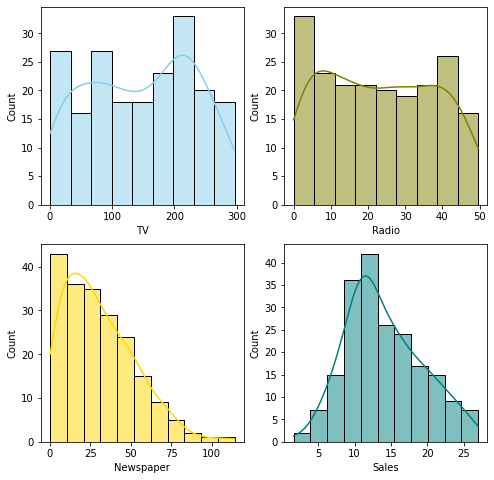

In [220]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.histplot(data=df, x="TV", kde = True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Radio", kde = True,color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Newspaper", kde = True,color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Sales", kde = True,color="teal", ax=axs[1, 1])

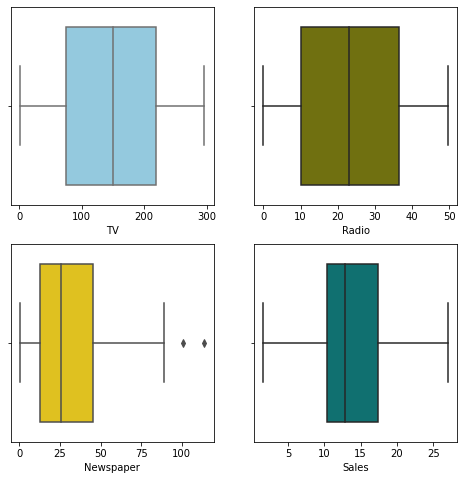

In [221]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))

sns.boxplot(data=df, x="TV", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="Radio", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="Newspaper", color="gold", ax=axs[1, 0])
sns.boxplot(data=df, x="Sales", color="teal", ax=axs[1, 1])

## Observation
- All the variables are almost normally distributed
- we can see few outliers in the 'Newspaper' feature

## Bivariate Analysis (Relationships between important variables)

## For correlation: Heatmaps, Pairplots

In [222]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Heatmap

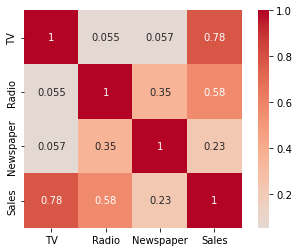

In [223]:
corr = df.corr()
sns.heatmap(corr,square=True,center=0,annot=True,cmap='coolwarm')

## Pairplot

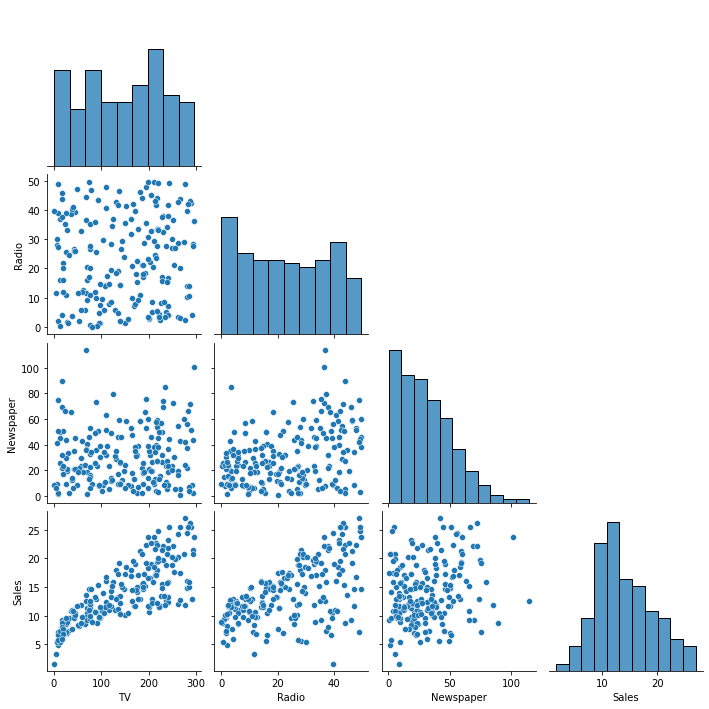

In [224]:
sns.pairplot(df,corner=True)

In [225]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Observations
- Based on the heatmap and pairplot,
    - "TV" predictor variable is highly correlated with 'Sales' Target variable
    - "Radio" predictor variable is moderately correlated with 'Sales' varibale
    - "Newspaper" feature is weakly correlated with Target variable

## Business Insights based on Non-Graphical and Visual Analysis

#### Comments on the range of attributes
- There are 200 records with 4 features
- All the features are of numerical type
- There are no missing values in the data

#### Comments on the distribution of the variables and relationship between them
- All the variables are almost normally distributed
- We can see few outliers in the 'Newspaper' feature
- 'TV' is strongly positively correlated with sales and 'Radio' feature is also positively correlated with 'Sales' but not as much as 'TV'. 
- 'Newspaper' is weakly correlated with 'Sales'.
- Independent variables 'TV','Newspaper','Radio' are not correlated with each other

### comments for each univariate and bivariate plot
- Based on the histplot, all the variables follows normal distribution
- Based on the boxplot, no outliers are present for variables 'TV','Radio', 'Sales' whereas few outliers are present for the variable 'Newspaper'
- Based on the heatmap and pairplot, 'TV' and 'Radio' variables are correlated with 'Sales' target feature.

## 2. Data Preprocessing

### Checking duplicates

In [226]:
df.duplicated().any()

False

## Checking null values

In [227]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Outlier detection

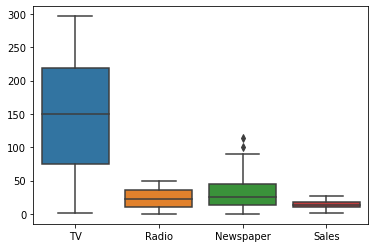

In [228]:
sns.boxplot(data=df)

In [229]:
df1 = df.copy()

## Outlier Removal

In [230]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [231]:
for column in df1.columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

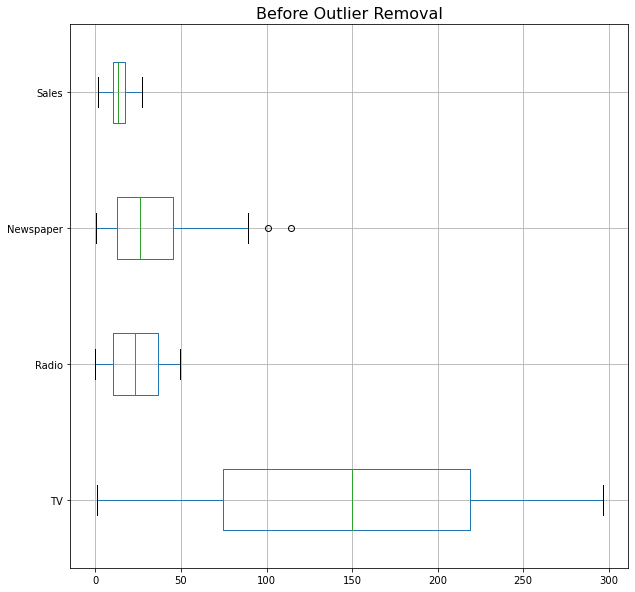

In [232]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('Before Outlier Removal',fontsize=16)
plt.show()

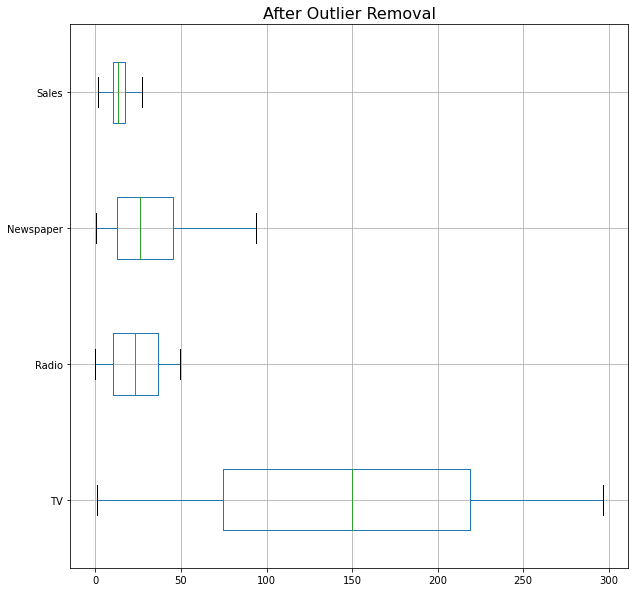

In [233]:
plt.figure(figsize=(10,10))
df1.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [234]:
df1.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [235]:
df1.shape

(200, 4)

## Data preparation for modeling

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
df1['TV'] = std_scale.fit_transform(df1[['TV']])
df1['Radio'] = std_scale.fit_transform(df1[['Radio']])
df1['Newspaper'] = std_scale.fit_transform(df1[['Newspaper']])

In [236]:
X = df1[["TV","Radio","Newspaper"]] 
y = df1.Sales

## Model building 

### Build the Linear Regression model and comment on the model statistics

In [237]:
# Hold out method - divide the whole dataset into two sets. Then use one for training and the other for model evaluation. 
# If the dataset is relatively small (n < 10,000), 70:30 would be a suitable choice.

In [238]:
# Split X and y into training and test set in 70:30 ratio
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [239]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [240]:
xtrain.shape

(140, 3)

In [241]:
ytrain.shape

(140,)

### Display model coefficients with column names

In [242]:
pd.DataFrame(zip(xtrain.columns, model.coef_),columns=['Features', 'Coefficients']).style.hide_index()

Features,Coefficients
TV,0.044066
Radio,0.199287
Newspaper,0.006923


In [243]:
print(model.intercept_)

2.7070118464367727


In [244]:
# R square on training data
model.score(xtrain, ytrain)

0.9055124964622553

### Linear Regression using statsmodels

In [245]:
data_train = pd.concat([xtrain, ytrain], axis=1)
data_test=pd.concat([xtest,ytest],axis=1)
data_train.head()

,TV,Radio,Newspaper,Sales
169,284.3,10.6,6.4,15.0
97,184.9,21.0,22.0,15.5
31,112.9,17.4,38.6,11.9
12,23.8,35.1,65.9,9.2
35,290.7,4.1,8.5,12.8


In [246]:
expr1= 'Sales ~ TV + Radio + Newspaper'

In [247]:
import statsmodels.formula.api as smf
stat_full = smf.ols(formula=expr1,data=data_train).fit()
stat_full.params

Intercept    2.707012
TV           0.044066
Radio        0.199287
Newspaper    0.006923
dtype: float64

In [248]:
stat_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.89e-69
Time:                        11:13:10   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7070      0.374      7.229      0.000       1.966       3.448
TV             0.0441      0.002     27.224      0.000       0.041       0.047
Radio          0.1993      0.010     20.189      0.000       0.180       0.219
Newspaper      0.0069      0.007      0.985      0.326      -0.007       0.021
==============================================================================
Omnibus:                       68.408   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.878
Skew:                          -1.708   Prob(JB):                     2.84e-71
Kurtosis:                       9.635   Cond. No.                         501.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
expr2= 'Sales ~ TV + Radio '

In [250]:
stat_TVR = smf.ols(formula=expr2,data=data_train).fit()
stat_TVR.params

Intercept    2.837617
TV           0.044077
Radio        0.202606
dtype: float64

In [251]:
stat_TVR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     651.3
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.06e-70
Time:                        11:13:11   Log-Likelihood:                -262.71
No. Observations:                 140   AIC:                             531.4
Df Residuals:                     137   BIC:                             540.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8376      0.350      8.103      0.000       2.145       3.530
TV             0.0441      0.002     27.234      0.000       0.041       0.047
Radio          0.2026      0.009     21.837      0.000       0.184       0.221
==============================================================================
Omnibus:                       72.173   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.670
Skew:                          -1.780   Prob(JB):                     9.77e-83
Kurtosis:                      10.216   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
expr3= 'Sales ~ TV + Newspaper'

In [253]:
stat_TVN = smf.ols(formula=expr3,data=data_train).fit()
stat_TVN.params

Intercept    5.619976
TV           0.046013
Newspaper    0.055309
dtype: float64

In [254]:
stat_TVN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.08e-29
Time:                        11:13:11   Log-Likelihood:                -359.20
No. Observations:                 140   AIC:                             724.4
Df Residuals:                     137   BIC:                             733.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6200      0.688      8.164      0.000       4.259       6.981
TV             0.0460      0.003     14.296      0.000       0.040       0.052
Newspaper      0.0553      0.013      4.205      0.000       0.029       0.081
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.365
Skew:                          -0.108   Prob(JB):                        0.833
Kurtosis:                       2.874   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
- Based on the statistical model OLS summary,it is evident that R2 score remains unchanged when TV,Radio predictor variables are considered for predicting Sales. 
- Also, adding Newspaper variable shows no significant improvement in the Sales prediction. 
- Thus important variables contributing to Sales are TV and Radio based on the analysis.

In [255]:
for i,j in np.array(stat_full.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.71) * Intercept + (0.04) * TV + (0.2) * Radio + (0.01) * Newspaper + 

- When the advertising budget for Radio increases by 1 unit, Sales will be increased to 0.2 units, keeping all other
  predictors constant. 
- Similarly, when the advertising budget for TV increases by 1 unit, Sales will be increased to 0.04 units,
  keeping all other predictors constant.
- The TV and Radio variables are substantial predictors of sales since coefficient estimates are high compared to
  Newspaper predictor variable

## Testing the assumptions of linear regression model 

### Multicollinearity check by VIF score

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [257]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Radio,3.30
2,Newspaper,3.12
0,TV,2.50


##### There are no significant multicollinearity issues as VIF < 5

## Mean of residuals is nearly zero

In [258]:
pred=model.fit(xtrain, ytrain).predict(xtest)

In [259]:
residuals = ytest-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.03629818763624595


Mean of the residuals are nearly 0

## Linearity of variables

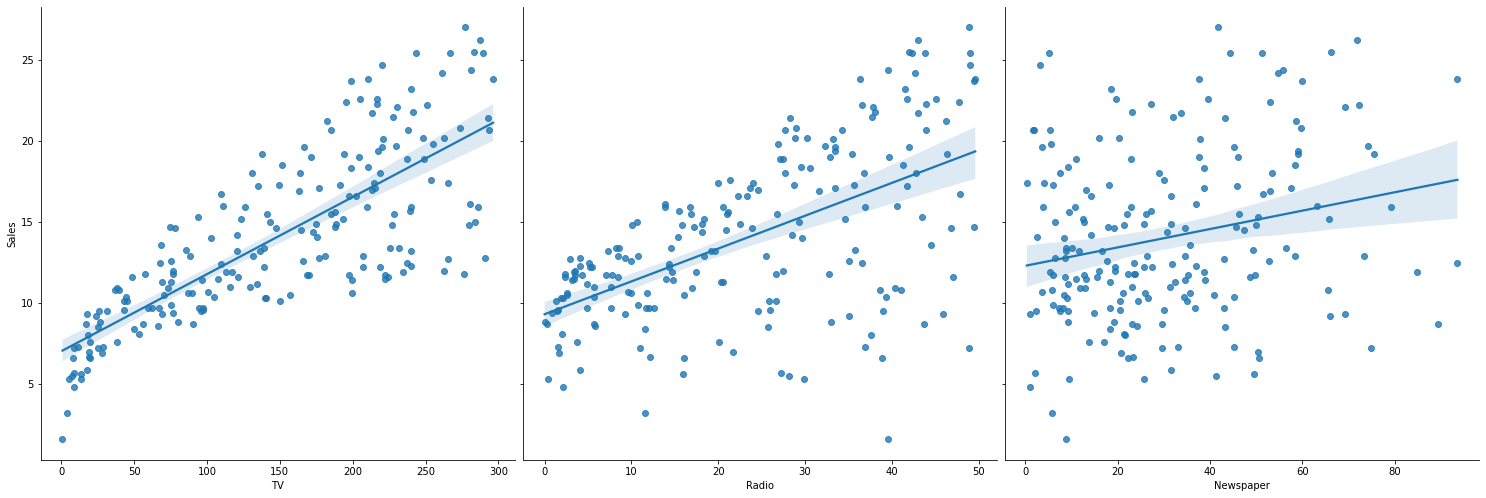

In [260]:
sns.pairplot(df1, x_vars = ['TV','Radio','Newspaper'], y_vars='Sales',size=7, kind='reg')

All the Predictor variables TV, Radio and Newspaper are linearly dependent on Sales.

##  Test for Homoscedasticity

In [261]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(stat_full.resid, stat_full.model.exog)
lzip(names, test)

[('Lagrange multiplier statistic', 5.700012362754583),
 ('p-value', 0.12715322528295478),
 ('f-value', 1.924054983108667),
 ('f p-value', 0.12861190419451776)]

## Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

In [262]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(stat_full.resid)

ShapiroResult(statistic=0.89471036195755, pvalue=1.6332050378764507e-08)

In [263]:
print(np.sqrt(residuals).skew())

-0.20764640144519822


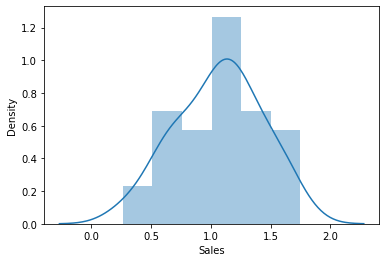

In [264]:
sns.distplot(np.sqrt(residuals),kde=True)

In [265]:
from scipy import stats

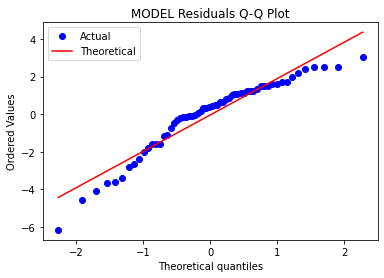

In [266]:
stats.probplot(residuals,dist="norm", plot= plt) # 
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

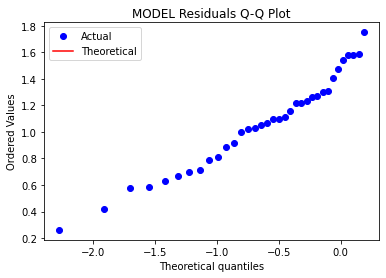

In [267]:
stats.probplot(np.sqrt(residuals),dist="norm", plot= plt) # 
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

## Model Performance Evaluation

In [268]:
from sklearn import metrics
lin_model = LinearRegression()
predicted_train=lin_model.fit(xtrain, ytrain).predict(xtrain)
predicted_test=lin_model.fit(xtrain, ytrain).predict(xtest)

#### Metrics  - MAE, RMSE, R2, Adj R2

In [269]:
# MAE on training data
metrics.mean_absolute_error(ytrain,predicted_train)

1.1585227557802849

In [270]:
# MAE on test data
metrics.mean_absolute_error(ytest,predicted_test)

1.5095671519141913

In [271]:
# RMSE on Training data
np.sqrt(metrics.mean_squared_error(ytrain,predicted_train))

1.5746256091552049

In [272]:
# RMSE on Testing data
np.sqrt(metrics.mean_squared_error(ytest,predicted_test))

1.9472864778494812

In [273]:
# R2 score on Training data
lin_model.score(xtrain,ytrain)

0.9055124964622553

In [274]:
# R2 score on Testing data
lin_model.score(xtest,ytest)

0.8611251045785457

In [275]:
# Adjusted R2 score in training data
1 - (1-lin_model.score(xtrain, ytrain))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)

0.9034282132959816

In [276]:
# Adjusted R2 score in test data
1 - (1-lin_model.score(xtest, ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)

0.8536853780381106

## Experiments for improvement

In [277]:
features_2 = X.drop('Newspaper', axis = 1)
train_x,test_x, train_y,test_y = train_test_split(features_2, y, test_size = 0.2, random_state = 42)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(160, 2)
(40, 2)
(160,)
(40,)


In [278]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [279]:
lin_reg_model.score(train_x,train_y)

0.8955982149747163

In [280]:
lin_reg_model.score(test_x,test_y)

0.9005833101920357

In [281]:
# Adjusted R2 score in training data
1 - (1-lin_reg_model.score(train_x,train_y))*(len(train_y)-1)/(len(train_y)-train_x.shape[1]-1)

0.8942682559298082

In [282]:
# Adjusted R2 score in test data
1 - (1-lin_reg_model.score(test_x, test_y))*(len(test_y)-1)/(len(test_y)-test_x.shape[1]-1)

0.8952094350672809

## Actionable Insights & Recommendations

### Comments on significance of predictor variables

- Because radio and television advertising are more effective predictors of sales than newspaper advertising,
  with low p-values and highly significant t-statistic values, it is suggested that these media should be given priority 
  over newspapers. 
- More advertising on TV and radio is likely to boost sales, according to coefficient estimates for both channels.

- The coefficient estimate for newspaper advertising, on the other hand, is extremely low and not statistically     significant, indicating that it is not a reliable predictor of sales. As a result, businesses might wish to consider  reducing their newspaper advertising spending or moving their resources to media like TV and radio that are better at 
  reaching their target consumers.

### Comments on additional data sources for model improvement 

- Other communication channels like internet media could be considered for improving the efficacy of advertising     expenditure.
- Research also discovered that the efficacy of advertising expenditure was significantly influenced by creative advertising and audience targeting.

### Model implementation in real world and Potential business benefits from improving the model

- The impact of various advertising budget sizes on sales can be calculated using the forecasting model that is provided.
- It is important to remember that this model assumes that all other variables remain constant, which may not always be
the case in real-world situations. 
- It is therefore recommended to use this model as a starting point for advertising 
planning and to constantly monitor the outcomes of actual sales in order to adjust advertising budget.